<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2020/sem08/real_expect.png" width="500">

# Домашнее задание 6: параметрические тесты
</center>

**ФИО:**

## Общая информация

__Дата выдачи:__ 23.04.2025

__Дедлайн:__ 23:59MSK 11.05.2025

In [1]:
import numpy as np
import math
import pandas as pd
from scipy import stats
import statsmodels as sts 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Задача №1: Лучше найди себе девушку! (25 баллов)

В этой задаче вам предстоит проверить несколько гипотез на датасете из американского сервиса знакомств. Датасет называется `dating_is_hard.csv`

Колонки датасета:
- `age` - возраст
- `is_heavy_drinker` - алкоголизм в булевом виде
- `height` - рост в дюймах
- `sex` - полов может быть только два - f для женщин и m для мужчин.
- `smokes` - зависимость от табака в булевом виде
- `location` - место жительства
- `offspring` - отношение к детям

Для каждого пункта нужно расписать нулевую и альтернативную гипотезу, описать какой именно критерий вы используете, перечислить предпослыки необходимые для его использования, а также вычислить значение статистики и p-value, если это возможно.

In [2]:
df = pd.read_csv('data/dating_is_hard.csv')

In [3]:
df.head()

,Unnamed: 0,age,is_heavy_drinker,height,sex,smokes,location,offspring
0,uid_1,27,False,64,f,True,san francisco california,no opinion
1,uid_2,38,False,65,f,False,oakland california,wants kids
2,uid_3,31,False,70,m,True,san francisco california,does not have kids
3,uid_4,29,False,66,m,False,martinez california,does not have kids
4,uid_5,30,False,69,m,True,san francisco california,no opinion


In [4]:
# Полезная функция из тетрадки Фила
def asy_mean_test(mean_, std_, mu_0=0, 
                   alpha=0.05, alternative='two-sided', margin=3):
    """
        Асимптотический тест для равенства средних
    """
    
    z_obs = (mean_ - mu_0)/std_
    
    if alternative == 'two-sided':
        p_value = 2 * (1 - stats.norm().cdf(np.abs(z_obs)))
        z_crit = stats.norm().ppf(1 - alpha/2)
        
        statistics = ['-z_crit', 'z_crit', '-z_obs', 'z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'), 
                                       (z_crit, 0.05, z_crit, margin, 'b'),
                                       (-z_obs, -0.6, -margin, -z_obs, 'r'), 
                                       (z_obs, 0.1, z_obs, margin, 'r')]))
    
    if alternative == 'less':
        p_value = stats.norm().cdf(z_obs)
        z_crit = stats.norm().ppf(1 - alpha)
        
        statistics = ['-z_crit', '-z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'), 
                                       (-z_obs, -0.6, -margin, -z_obs, 'r')]))

    if alternative == 'larger':
        p_value = 1 - stats.norm().cdf(z_obs)
        z_crit = stats.norm().ppf(1 - alpha)
        
        statistics = ['z_crit', 'z_obs']
        params = dict(zip(statistics, [(z_crit, 0.05, z_crit, margin, 'b'),
                                       (z_obs, 0.1, z_obs, margin, 'r')]))
    
    
    plt.figure(figsize = (10, 5))
    x = np.linspace(-margin, margin)
    pdf = stats.norm().pdf(x)

    plt.plot(x, pdf, color="black")
    plt.ylabel("$f(x)$", fontsize=16)
    plt.xlabel("$x$", fontsize=16)
    y_max = plt.ylim()[1]
    
    for i in range(len(statistics)):
        statistic, text_margin, left_bound, right_bound, color = params[statistics[i]]
        
        plt.axvline(statistic, color=color, linestyle="--", lw=2)
        h = 0.8 if statistics[i].split('_')[-1] == 'crit' else 0.6
        plt.text(statistic + text_margin, 
                 h*y_max, round(statistic, 2), color=color, fontsize=16)
        
        xq = np.linspace(left_bound, right_bound)
        yq = stats.norm().pdf(xq)
        plt.fill_between(xq, 0, yq, color=color, alpha=0.2)
    
    return p_value

__a) [5 баллов]__ Рост в приложениях для знакомств не проверяют, поэтому можно поставить себе любой и никто не узнает. Посмотрим же, врут ли люди о своём росте.

Проверьте две гипотезы: совпадает ли средний рост мужчин в приложении с их реальным средним ростом и совпадает ли средний рост женщин в приложении с их реальным средним ростом

__P.S.__ Средний рост мы вам не дамим. Ищите сами и приложите ссылку на источник в решении.

In [5]:
# Средний рост
avg_m_height = 177 / 2.54
avg_f_height = 163 / 2.54

# Разделение по полу
males = df[df['sex'] == 'm']
females = df[df['sex'] == 'f']

# Источник
'https://www.worlddata.info/average-bodyheight.php'

'https://www.worlddata.info/average-bodyheight.php'

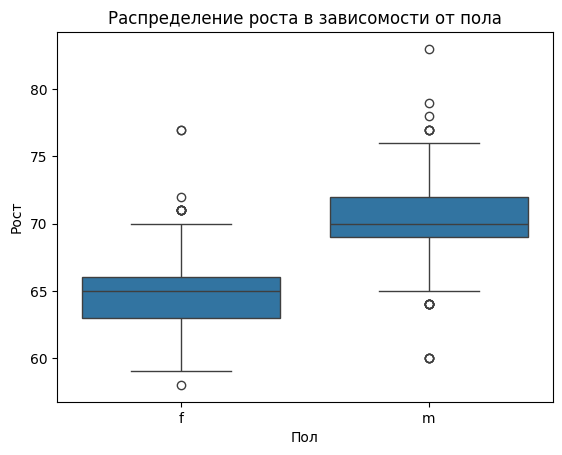

In [6]:
# Смотрим на выбросы
sns.boxplot(x='sex', y='height', data=df)
plt.title('Распределение роста в зависомости от пола')
plt.xlabel('Пол')
plt.ylabel('Рост')
plt.show()

* Выборки независимые, выбросов практически нет, данных много, можем применить ЦПТ и провести АБ-тест, пользоватся будем z-критерием для среднего
* H0 - средний рост в приложении равен реальному среднему росту
* H1 - средний рост в приложении отличается от реального

Размер выборки: 600
Выборочное среднее: 70.30, Реальный средний рост: 69.69
p-value: 0.00
Отвергаем H0: Средний рост в приложении отличается от реального.


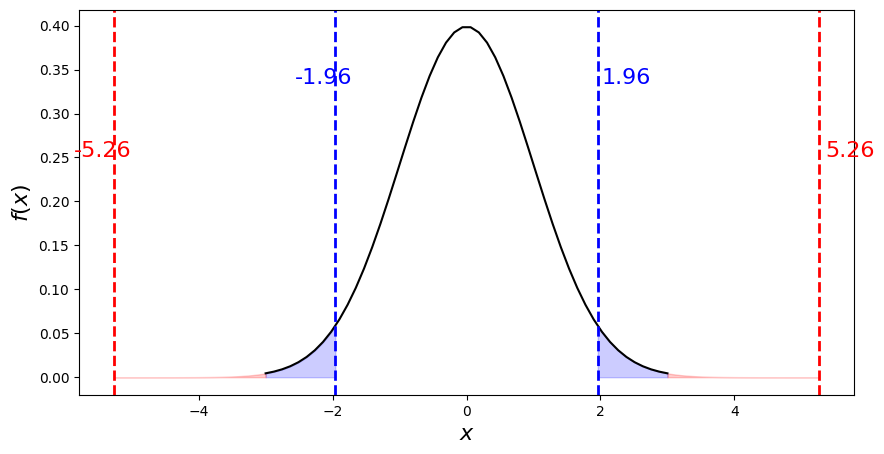

In [7]:
# Функция для вычисления статистик и проведения теста
def run_ab_test(sample, mu_0):
    # Выборочные статистики
    mean_ = np.mean(sample)
    std_ = np.std(sample, ddof=1) / np.sqrt(len(sample))
    
    # Расчёт p-value
    p_value = asy_mean_test(
        mean_=mean_,
        std_=std_,
        mu_0=mu_0,
        alpha=0.05,
        alternative='two-sided'
    )
    
    # Вывод результатов
    print(f"Размер выборки: {len(sample)}")
    print(f'Выборочное среднее: {mean_:.2f}, Реальный средний рост: {mu_0:.2f}')
    print(f"p-value: {p_value:.2f}")
    if p_value < 0.05:
        print("Отвергаем H0: Средний рост в приложении отличается от реального.")
    else:
        
        print("Не отвергаем H0: Нет оснований считать, что средний рост отличается.")


# Тест для мужчин
run_ab_test(males['height'], mu_0=avg_m_height)

Размер выборки: 400
Выборочное среднее: 64.83, Реальный средний рост: 64.17
p-value: 0.00
Отвергаем H0: Средний рост в приложении отличается от реального.


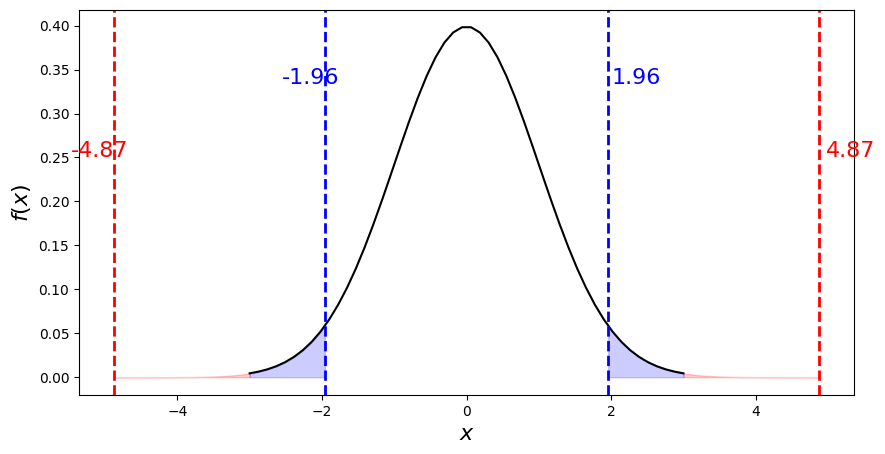

In [8]:
# Тест для женщин
run_ab_test(females['height'], mu_0=avg_f_height)

__Вывод:__
* Отвергаем нулевые гипотезы в обоих случаях, средний рост в приложении отличается от реального (z-критерий для средних)

__б) [10 баллов]__ По моим наблюдениям (состоящим из одного человека) мужчин-алкоголиков гораздо больше женщин. В нашем датасете алкоголизмом мы будем считать параметр `is_heavy_drinker`

Проверьте гипотезу: Действительно ли доля мужчин-алкоголиков выше доли женщин-алкоголиков?

* Так как доли малые (<10%), как и сами выборки(<100), в данном случае будем использовать точный критерий Фишера для независимых выборок
* H0 - Доля мужчин-алкоголиков равна доле женщин-алкоголиков
* H1 - Доля мужчин алкоголиков выше, чем женщин-алкоголиков

In [9]:
# Считаем алкоголиков
alpha = 0.05
m_drink = sum(males['is_heavy_drinker'])
m_cnt = len(males)
f_drink = sum(females['is_heavy_drinker'])
f_cnt = len(females)

# Считаем доли
p_m = m_drink / m_cnt
p_f = f_drink / f_cnt

# Формируем таблицу сопряженности для критерия Фишера
contingency_table = [
    [m_drink, m_cnt - m_drink],
    [f_drink, f_cnt - f_drink]
]

# Применяем точный критерий Фишера
odds_ratio, p_value = stats.fisher_exact(contingency_table, alternative='greater')

# Вывод результатов
print(f"Размеры выборок: {m_drink, f_drink}")
print(f"Доля мужчин-алкоголиков: {p_m:.4f}")
print(f"Доля женщин-алкоголиков: {p_f:.4f}\n")
print(f"p-value: {p_value:.4f}")
if p_value < alpha:
    print("Отвергаем H0: Доля мужчин-алкоголиков статистически значимо выше")
else:
    print("Не отвергаем H0: Нет оснований считать, что доля мужчин-алкоголиков выше")

Размеры выборок: (51, 31)
Доля мужчин-алкоголиков: 0.0850
Доля женщин-алкоголиков: 0.0775

p-value: 0.3822
Не отвергаем H0: Нет оснований считать, что доля мужчин-алкоголиков выше


__Вывод:__
* Нулевую гипотезу не отвергаем, нет оснований считать, что доля мужчин-алкоголиков выше (точный тест Фишера)

__в) [10 баллов]__ Мой друг Володька решил бросить курить и теперь курит только когда пьёт. Это навело меня на мысль о том, что курение привлекает алкоголиков сильнее, чем обычных людей.

Проверьте гипотезу: Действительно ли алкоголики больше склонны к курению, чем неалкоголики?

`Гипотезы`
* Размеры выборок и долей позволяют воспользоватся z-критерием для разницы долей для независимых выборок, этим и займёмся
* H0 - Доля курящих алкоголиков равна доле курящих неалкоголиков
* H1 - Доля курящих алкоголиков выше доли курящих неалкоголиков

In [10]:
# Считаем количество и доли куряющих и некурящих алкоголиков
n_drink = len(df[df['is_heavy_drinker'] == 1])
n_no_drink = len(df[df['is_heavy_drinker'] == 0])
drink_smoke = len(df[(df['is_heavy_drinker']==1) & (df['smokes']==1)])
no_drink_smoke = len(df[(df['is_heavy_drinker']==0) & (df['smokes']==1)])

p_drink_smoke = drink_smoke / n_drink
p_no_drink_smoke = no_drink_smoke / n_no_drink
P = (drink_smoke + no_drink_smoke) / (n_drink + n_no_drink)

# Разность долей, стандартное отклонение разности
diff = p_drink_smoke - p_no_drink_smoke
diff_std = np.sqrt(P*(1-P)*(1/n_drink + 1/n_no_drink))

# z-статистика
z = diff / diff_std
p_value = 1 - stats.norm.cdf(z)

# Вывод результатов
print(f"Размеры выборок: {drink_smoke, no_drink_smoke}")
print(f"Доля курящих алкоголиков: {p_drink_smoke:.4f}")
print(f"Доля курящих неалкоголиков: {p_no_drink_smoke:.4f}\n")
print(f"Z-статистика: {z:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Отвергаем H0: Доля курящих алкоголиков статистически значимо выше")
else:
    print("Не отвергаем H0: Нет оснований считать, что доля курящих алкоголиков выше")

Размеры выборок: (35, 357)
Доля курящих алкоголиков: 0.4268
Доля курящих неалкоголиков: 0.3889

Z-статистика: 0.6743
P-value: 0.2501
Не отвергаем H0: Нет оснований считать, что доля курящих алкоголиков выше


**Вывод:**
* Нулевую гипотезу не отвергаем, z-тест не показал, что доля курящих алкоголиков выше доли курящих неалкоголиков

### Задача №2. Тестируем новый интерфейс страницы отеля  (25 баллов)

Все мы любим отдыхать! А злые корпорации любят наживаться на нашем желании отдыхать.

Представим что вы работаете в одной из таких корпораций и занимаетесь аналитикой сайта для бронирования отелей. Процесс бронирования имеет привычную структуру:
- вбиваете в поиск направленния и даты
- получаете выдачу вариантов отелей
- переходите на страницу отеля
- нажимаете кнопку "забронировать"
- попадаете на страницу оплаты
- оплачиваете

Очевидно, на всех этапах этой воронки вы можете потерять пользователя. Поисследовав поведение пользователей вы решили внести изменения на странице об отеле и хотите чтобы выросла конверсия в бронирования

__а) [3 балла]__ Подумайте, какие изменения могли бы быть внесены?

**Ваш ответ:**
* Выделение отзывов на отель с высоким рейтингом
* Сделать кнопку *забронировать* визуально более заметной
* Добавить больше фото\видео материалов об отеле
* Указывать итоговую стоимость номеров в отеле

Перед вами датасет `ab_test.csv`, в нем содержатся данные о пользователях в период теста

`user_id` - уникальный идентификатор пользователя \
`sex` - пол пользователя \
`datetime` - дата и время посещения сайта (начала сессии) \
`district` - регион расположения отеля \
`hotel_page` - был ли пользователь на странице отеля в сессии \
`payment_page` - был ли пользователь на странице оплаты в сессии \
`payment` - была ли произведена оплата в сессии \
`group` - группа в эксперименте

Поскольку изменения вносились на странице отеля нас интересуют именно дошедшие до этой страницы пользователи. Поэтому колонка `hotel_page` принимает значение 1 всегда

In [ ]:
df = pd.read_csv("data/ab_simpson.csv")
df.head()

,Unnamed: 0,user_id,sex,datetime,district,hotel_page,payment_page,payment,group
0,0,3326449108867616315,1,11/15/2023 12:02 AM,Южный федеральный округ,1,1,0,control
1,1,7887645543455909870,1,11/02/2023 09:12 PM,Центральный федеральный округ,1,1,0,control
2,2,6148146969124793824,1,11/10/2023 10:06 AM,Центральный федеральный округ,1,1,1,control
3,3,2721602951940155275,0,11/12/2023 07:10 PM,Центральный федеральный округ,1,1,0,control
4,4,1829030712785972138,0,05/01/2024 05:19 AM,Южный федеральный округ,1,0,0,test


__б) [3 балла]__ Сделайте небольшой eda, какие выводы вы можете сделать о данных? Корректно ли проводился аб тест? Найдите ошибки и объясните почему это некорректно.

In [ ]:
# Размер групп
print("\nРазмер групп:")
print(df['group'].value_counts())

# Распределение по полу
print("\nРаспределение по полу:")
print(df.groupby('group')['sex'].value_counts())

# Распределение по регионам
print("\nРаспределение по регионам:")
df.groupby('group')['district'].value_counts()


Размер групп:
group
test       201935
control    199872
Name: count, dtype: int64

Распределение по полу:
group    sex
control  0       99991
         1       99881
test     1      101020
         0      100915
Name: count, dtype: int64

Распределение по регионам:


group    district                         
control  Центральный федеральный округ        79949
         Южный федеральный округ              39975
         Северо-Западный федеральный округ    39974
         Приволжский федеральный округ        23985
         Сибирский федеральный округ           7994
         Уральский федеральный округ           5996
         Дальневосточный федеральный округ     1999
test     Южный федеральный округ              80774
         Центральный федеральный округ        40387
         Приволжский федеральный округ        36348
         Уральский федеральный округ          20193
         Северо-Западный федеральный округ    10097
         Сибирский федеральный округ           8078
         Дальневосточный федеральный округ     6058
Name: count, dtype: int64

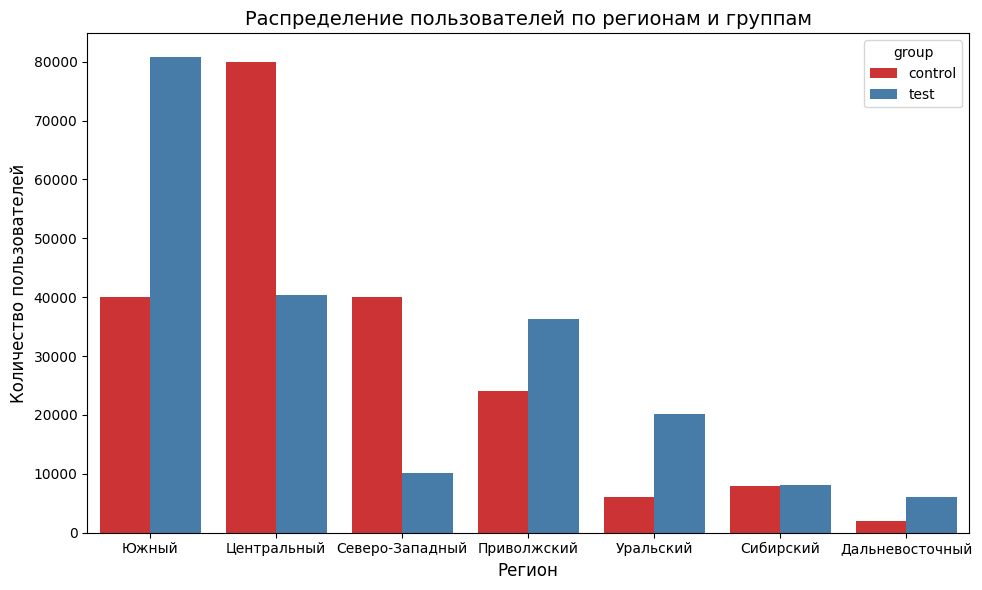

In [ ]:
# Построение графика с использованием countplot
df_plt = df.copy()
df_plt['district'] = df_plt['district'].str.replace(' федеральный округ','')


plt.figure(figsize=(10, 6))
sns.countplot(data=df_plt, x='district', hue='group', palette='Set1')
plt.title('Распределение пользователей по регионам и группам', fontsize=14)
plt.xlabel('Регион', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.tight_layout()
plt.show()

`Выводы`
* Распределение по количеству участников и их полу между группами практически одинаковое, выборки достаточно большие для проведения АБ-теста
* При этом между группами распределение по федеральным округам достаточно неравномерное, что может значительно сказаться на результатах АБ-теста

Раскроем правду. Изменение продукта касалось адаптации страницы отеля под его регион. Например, в южных регионах пользователям на странице отеля предлагались активности для пляжного отдыха, а в северном и центральном регионе сразу подбирались ближайшие экскурсии и так далее.

__в) [5 баллов]__ Проанализируйте, как ведут себя конверсии в страницу оплаты и в оплату в разных регионах? Опишите выводы.

In [ ]:
# Группировка
df_group_reg = (df.groupby(['district','group'])[['hotel_page', 'payment_page', 'payment']]
                .sum().reset_index())

# Посчитаем конверсию
df_group_reg['hotel_to_payment_page'] = df_group_reg['payment_page'] / df_group_reg['hotel_page']
df_group_reg['payment_page_to_payment'] = df_group_reg['payment'] / df_group_reg['payment_page']
df_group_reg['hotel_to_payment'] = df_group_reg['payment'] / df_group_reg['hotel_page']
display(df_group_reg)

# Преобразуем в данные в длинныый вид
df_melt_reg = pd.melt(df_group_reg, id_vars=['district', 'group'], 
                      value_vars=['hotel_to_payment_page', 'payment_page_to_payment', 'hotel_to_payment'], 
                      var_name='stage')
df_melt_reg['district'] = df_melt_reg['district'].str.replace(' федеральный округ','')

# Построение графика
fig = px.bar(df_melt_reg, x='stage', 
             y='value', color='group', 
             facet_col='district', barmode='group', 
             title='Конверсия пользователей по этапам воронки и регионам',
             labels={'stage': 'Этап воронки', 'value': 'Количество пользователей', 'group': 'Группа'})

# Наводим красоту
fig.update_layout(height=600, width=1200,
    title_x=0.5, showlegend=True, template='plotly_white')
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

,district,group,hotel_page,payment_page,payment,hotel_to_payment_page,payment_page_to_payment,hotel_to_payment
0,Дальневосточный федеральный округ,control,1999,200,464,0.100050,2.320000,0.232116
1,Дальневосточный федеральный округ,test,6058,1212,2028,0.200066,1.673267,0.334764
2,Приволжский федеральный округ,control,23985,14391,6046,0.600000,0.420124,0.252074
3,Приволжский федеральный округ,test,36348,23626,12159,0.649994,0.514645,0.334516
4,Северо-Западный федеральный округ,control,39974,27982,10063,0.700005,0.359624,0.251739
5,Северо-Западный федеральный округ,test,10097,7270,3353,0.720016,0.461210,0.332079
6,Сибирский федеральный округ,control,7994,2398,1969,0.299975,0.821101,0.246310
7,Сибирский федеральный округ,test,8078,2585,2668,0.320005,1.032108,0.330280
8,Уральский федеральный округ,control,5996,2398,1446,0.399933,0.603003,0.241161
9,Уральский федеральный округ,test,20193,9087,6666,0.450007,0.733575,0.330114


`Выводы`
* Тестовая группа в большинстве регионов показывает более высокую конверсию на всех этапах воронки, изменения на странице отеля положительно сказались на конверсии
* Отдельно можно выделить выбивающуюся конверсию в Дальневосточном ФО на этапе перехода со страницы оплаты к оплате, и в тестовой и в контрольных группах конверсия больше 1, при этом выше именно в контрольной (хотя должно быть наоборот), возможно это связано с тем, что оплатить отель можно не только переходом со страницы оплаты, но и другими путями, но тогда нарушается логика воронки (при этом в Сибирском ФО наблюдается похожая картина)


__г) [5 баллов]__ Проанализируйте, улучшилась ли воронка для пользователей в тестовой группе по сравнению с контрольной вне зависимости от региона? Опишите выводы.

In [ ]:
# Посчитаем конверсию
df_group = df.groupby('group')[['hotel_page', 'payment_page', 'payment']].sum().reset_index()
df_group['hotel_to_payment_page'] = df_group['payment_page'] / df_group['hotel_page']
df_group['payment_page_to_payment'] = df_group['payment'] / df_group['payment_page']
df_group['hotel_to_payment'] = df_group['payment'] / df_group['hotel_page']
display(df_group)

# Строим график воронки по группам
df_melt = pd.melt(df_group, id_vars=['group'], 
                  value_vars=['hotel_page', 'payment_page', 'payment'],
                  var_name='stage')
fig = px.funnel(df_melt, x='value', y='stage', color='group')
fig.show()

,group,hotel_page,payment_page,payment,hotel_to_payment_page,payment_page_to_payment,hotel_to_payment
0,control,199872,151303,50002,0.756999,0.330476,0.250170
1,test,201935,146767,67423,0.726803,0.459388,0.333885


`Выводы`
* На этапе перехода со страницы отеля к странице оплаты конверсия в тестовой группе немного ниже  (~3%), что может указывать на то, что изменения, внедренные в группе test, сделали переход к странице оплаты менее эффективным
* На этапе перехода со страницы оплаты к оплате конверсия в тестовой группе выше (~13%), что говорит об положительном эффекте от внедренных изменений на странице отеля
* Общая конверсия в тестовой группе также выше (~8%), что также говорит о положительном эффекте от изменений

__д) [5 баллов]__ Проанализируйте распределение интересов пользователей в тестовой и контрольной группе. Какими регионами они интересовались? Изменились ли их предпочтения?

,group,district,interest_share
0,control,Дальневосточный,0.010001
1,control,Приволжский,0.120002
2,control,Северо-Западный,0.199998
3,control,Сибирский,0.039996
4,control,Уральский,0.029999
5,control,Центральный,0.400001
6,control,Южный,0.200003
7,test,Дальневосточный,0.030000
8,test,Приволжский,0.179999
9,test,Северо-Западный,0.050001


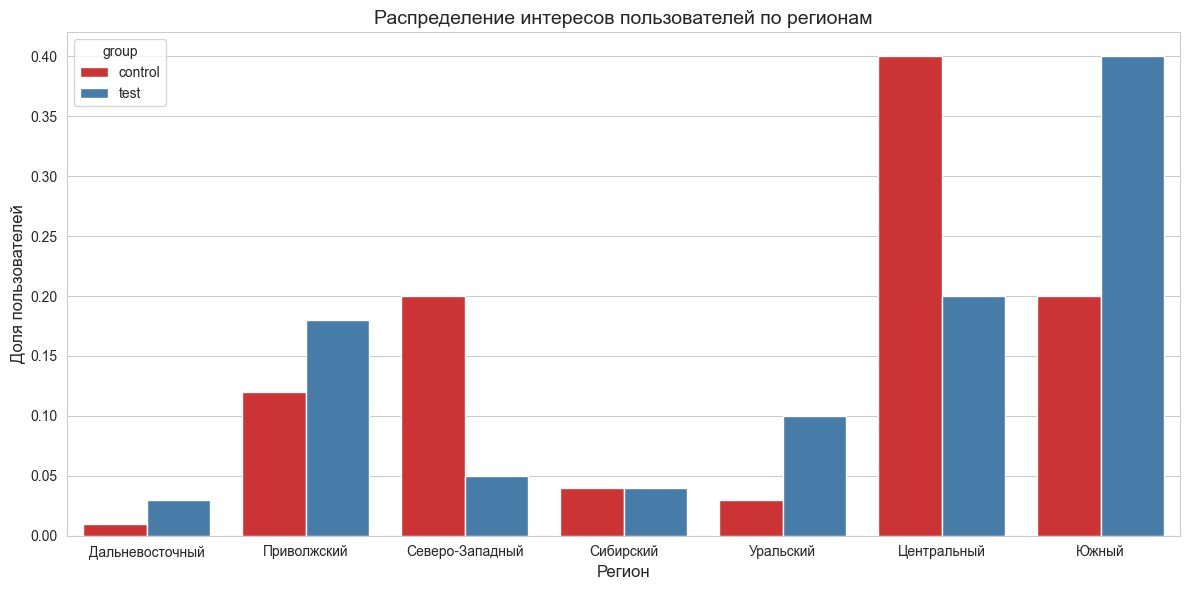

In [ ]:
# Группировка
df_grouped = df.groupby(['group', 'district'])['hotel_page'].sum().reset_index()
total_users = df.groupby('group')['hotel_page'].sum()
df_grouped['total_users'] = df_grouped['group'].map(total_users)
df_grouped['interest_share'] = df_grouped['hotel_page'] / df_grouped['total_users']
df_grouped['district'] = df_grouped['district'].str.replace(' федеральный округ','')
display(df_grouped[['group', 'district', 'interest_share']])

# Визуализация
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='district', y='interest_share', hue='group', palette='Set1')

# Настройка графика
plt.title('Распределение интересов пользователей по регионам', fontsize=14)
plt.xlabel('Регион', fontsize=12)
plt.ylabel('Доля пользователей', fontsize=12)
plt.tight_layout()
plt.show()

`Выводы`
* Интерес в контрольной группе: наибольший - Центральный ФО (40%), средний - Северо-Западный и Южный ФО (по 20%), наименьший - Дальневосточный ФО (1%)
* Интеререс в тестовой группе: наибольшой - Южный ФО (40%), средний - Приволжский (18%) и Уральский (15%), наименьший - Дальневосточный ФО (3%)

Если вы все сделали правильно, то у вас получился противоречивые ответы в пунктах 3 и 4. Вы попали в ловушку Парадокса Симпсона. Подробнее о нем можно почитать [здесь](https://ru.wikipedia.org/wiki/Парадокс_Симпсона)

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/simpson.jpg?raw=true" width="350" align='center'> 

__е) [4 балла]__ Теперь, когда вы все узнали, опишите кратко почему вы получили противоречивый результат в пунктах 3 и 4 (1 балл)

**Ваш ответ:**
* Так как мы имеем несбалансированную по регионам выборку, то можем наблюдать Парадокс Симпсона - по каждому региону наблюдается в тестовых группах (по сравнению с контрольными) наблюдается более высокая конверсия при переходе со страницы отеля на страницу оплаты, хотя если мы считаем общую конверсию (по всем регионам), то наблюдается обратная ситуация - эта конверсия ниже именно для тестовой группы
* Чтобы исправить этот парадокс нужно либо создать распределение пользователей по регионам + группам control и test одинаковым, либо при расчёте общей конверсии анализировать взвешенные данные (веса регионов)

## Задача №3: Не подглядывать! (50 баллов)

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/trump.png?raw=true" width="500" align='left'>

На американских выборах 2020 года в некоторых штатах проходила очень конкурентная борьба между кандидатами. По мере подсчета голосов перевес в голосах склонялся то в пользу демократов, то в пользу республиканцев. И вот, в один из таких моментов, когда чаша весов склонилась в пользу республиканцев, Д. Трамп написал в твиттер "stop the count!", что означало призыв к остановке подсчета голосов. 

_Здесь у вас мог возникнуть вопрос, и зачем нам это?_ 

Ответ очень прост. В этой ситуации всем очевидно, что призыв Трампа не мог быть осуществлен, то есть прерывать подсчет голосов раньше времени кажется довольно глупым способом выявления победителя. И вот абсолютно такой же способ принятия решения есть и в А/Б-тестах, только теперь многим аналитикам он уже кажется не столь очевидным, что приводит к существенным ошибкам в заключении выводов. 

_Решив эту задачу, мы познакомимся с такой проблемой подробнее и поймем, как не стоит делать, когда вы запускаете А/Б-тест._

Чтобы понять, в чем же именно заключается проблема, мы с вами будем проводить симуляции А/Б-тестов. Это когда мы генерируем данные уже со знаниями, как эти данные устроены. А затем, запуская процедуру проверки гипотез над такими симулированными данными, мы будем оценивать, что происходит на практике (при запуске А/Б-теста).

На практике же всегда неизвестно, как устроены данные, и проводя А/Б-тест мы пытаемся зафиксировать различия. Еще раз, здесь же мы будем знать об устройстве данных, а затем будем смотреть на поведение А/Б-теста, то есть как будто бы смотреть на тест с обратной стороны. 

_Перед тем как идти дальше, остановитесь здесь и еще раз зафиксируйте это!_

__а) [10 баллов]  Подсчет размера выборки для А/Б-теста__

Предположим, что вы хотите провести А/Б-тест внутри вашего приложения. Вы выбрали некоторую метрику $X$ – случайную величину из нормального распределения с мат. ожиданием $100$ у.е. и стандартным отклонением $40$ у.е – это ваш бейзлайн (группа А). Рассчитайте, сколько дней вам нужно крутить такой А/Б-тест, если:

1. Вы ожидаете получить минимальный размер эффекта в $5$ у.е.;
2. Вы хотите зафиксировать ошибку первого рода на уровне $\alpha=5\%$, а ошибку второго рода на уровне $\beta=20\%$;
3. Вы точно знаете, что в группе Б стандартное отклонение метрики составляет также $20$ у.е.
4. Посещаемость вашего приложения ежедневно составляет $200$ пользователей, и вы готовы раскатить тест на $100\%$ трафика.

Формула для расчета числа наблюдений _для одной группы_:

$$
n_{\text{one group}} = \frac{(\sigma_A^2 + \sigma_B^2) \cdot (z_{1-\frac{\alpha}{2}} + z_{1-\beta})^2}{MDE^2},
$$

__Подсказка:__ Помните, что после получения общего числа наблюдений вам нужно выразить это в дни! Вы должны получить целое число. Также будьте аккуратны с подсчетом трафика и кол-ва наблюдений – обратите внимание, со скольким числом групп вы работаете!

In [ ]:
# Данные
sigma_a = 40  # Стандартное отклонение группы А
sigma_b = 20  # Стандартное отклонение группы Б
mde = 5       # Минимальный размер эффекта
alpha = 0.05  # Ошибка первого рода
beta = 0.2   # Ошибка второго рода
daily_users = 200  # Ежедневная посещаемость

# Z-значения
z_alpha_2 = stats.norm.ppf(1 - alpha / 2)
z_beta = stats.norm.ppf(1 - beta)

# Число наблюдений в одной группе
n_one_group = math.ceil((sigma_a**2 + sigma_b**2) * ((z_alpha_2 + z_beta) ** 2) / (mde ** 2))

# Число наблюдений всего и ежедневно в 1 группе
n_total = n_one_group * 2
users_daily_group = 200 // 2

# Число дней для одной группы
days_group = n_one_group / users_daily_group
days = math.ceil(days_group)

print(f"Число наблюдений на группу: {n_one_group}")
print(f"Общее число наблюдений: {n_total}")
print(f"Число дней: {days}")

Число наблюдений на группу: 628
Общее число наблюдений: 1256
Число дней: 7


__б) [20 баллов] Симуляция А/Б-теста__

Теперь нам нужно запустить А/Б-тест. Для этого:

1. Сгенерируйте выборку данных из нормального распределения для группы А и Б в конкретный один день. Считайте, что в группе Б математическое ожидание составляет $105$ у.е., то есть с учетом размера вашего минимального ожидаемого эффекта из предыдущего пункта.

In [ ]:
# Генерируем для двух групп
np.random.seed(42)
mu_a = 100
mu_b = 105

group_a_day = np.random.normal(mu_a, sigma_a, users_daily_group)
group_b_day = np.random.normal(mu_b, sigma_b, users_daily_group)

print("Группа А (первые 5):", *group_a_day[:5])
print("Группа Б (первые 5):", *group_b_day[:5])

Группа А (первые 5): 119.86856612044932 94.46942795315262 125.90754152402769 160.92119425632103 90.63386501106656
Группа Б (первые 5): 76.69258515899172 96.58709354469282 98.14570966946461 88.95445461556761 101.77428576667981


2. Теперь представим, что наш тест был запущен $X$ дней. Напишите функцию, которая за этот период теста собирает в `DataFrame` следующие данные на каждый день теста: 
    1. среднее метрики в группе А
    2. среднее метрики в группе Б
    3. p-value, посчитанное с помощью t-test – можно воспользоваться встроенной функцией `scipy.stats.ttest_ind`
    
    Соберите `DataFrame` для $X=50$.
    
__Подсказка:__ Среднее для 1-го дня должно считаться по пользователям, пришедших в первый день, для второго дня – по пользователям, пришедшим в первый и второй день и т.д. То есть накопленным итогом за каждый день теста.

In [ ]:
# Симуляция АБ-теста
def ab_test(n_days, n_users_per_group, mu_a, sigma_a, mu_b, sigma_b):
    data_a = []
    data_b = []
    results = []

    # Генерация данных по дням
    for day in range(n_days):
        # Данные за текущий день
        day_data_a = np.random.normal(mu_a, sigma_a, n_users_per_group)
        day_data_b = np.random.normal(mu_b, sigma_b, n_users_per_group)
        data_a.extend(day_data_a)
        data_b.extend(day_data_b)
        
        # Считаем
        mean_a = np.mean(data_a)
        mean_b = np.mean(data_b)
        _, p_value = stats.ttest_ind(data_a, data_b, equal_var=False)
        
        results.append({'day': day + 1, 'mean_a': mean_a,
                        'mean_b': mean_b, 'p_value': p_value})
    
    # Создаем DF
    df = pd.DataFrame(results)
    return df

n_days = 50
df = ab_test(n_days, users_daily_group, mu_a, sigma_a, mu_b, sigma_b)

3. На основе `DataFrame` из предыдущего пункта постройте график динамики среднего в группе А и в группе Б по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится.

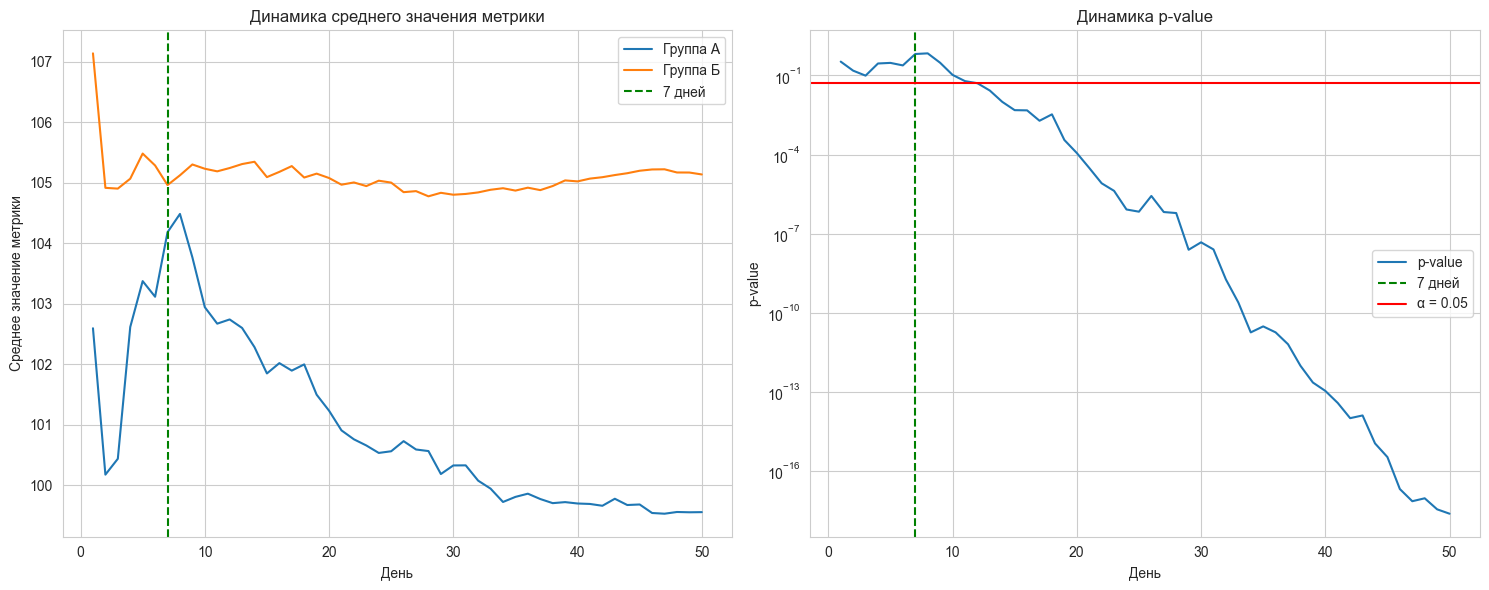

In [ ]:
# Построение графиков динамики среднего по дням и pvalue
def plot_days_pvalue(df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Динамика среднего значения метрики
    ax1.plot(df['day'], df['mean_a'], label='Группа А')
    ax1.plot(df['day'], df['mean_b'], label='Группа Б')
    ax1.axvline(x=7, color='green', linestyle='--', label='7 дней')
    ax1.set_title('Динамика среднего значения метрики')
    ax1.set_xlabel('День')
    ax1.set_ylabel('Среднее значение метрики')
    ax1.legend()
    ax1.grid(True)

    # Динамика p-value
    ax2.plot(df['day'], df['p_value'], label='p-value')
    ax2.axvline(x=7, color='green', linestyle='--', label='7 дней')
    ax2.axhline(y=0.05, color='red', linestyle='-', label='α = 0.05')
    ax2.set_title('Динамика p-value')
    ax2.set_xlabel('День')
    ax2.set_ylabel('p-value')
    ax2.set_yscale('log')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

plot_days_pvalue(df)

`Выводы - Динамика среднего значения метрики`
* На графике динамики среднего значения метрики по мере накопления данных видим сходимость к теоретическим мат.ожаданиям (100 для группы А и 105 для группы Б)
* Группа Б демонстрирует более стабильное поведение благодаря меньшему стандартному отклонению (20 против 40 в группе А)
* Разница в 5 единиц метрики между группами наблюдается с первых дней теста и сохраняется на протяжении всего времени
* На 7 день выборка уже достаточно велика для стабилизации средних значений метрики, но на графике это можно скорее сказать про группу Б, тогда как в группе А ещё наблюдаются колебания

`Выводы - Динамика p-value`
* В первые 10 дней эксперимента колеблеться в районе 0.01, но затем начинает стабильное снижение, эта динамика продолжается до 50-го дня включительно
* На 7 день p-value находится выше заданного уровня значимости (0.05), ниже его он становится примерно на 12 день

4. На основе `DataFrame` из предыдущего пункта постройте график динамики p-value по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится. Также отложите горизонтальную линию – ваш уровень значимости $\alpha$.

In [ ]:
# График и выводы для pvalue выше

5. Перегенируруйте шаги 2-4 несколько раз, посмотрев на графики. Что вы видите? Что происходит с p-value в периодах:
    1. до кол-ва дней, посчитанных по формуле из п.1
    2. в точке кол-ва дней, посчитанных по формуле из п.1
    3. после кол-ва дней, посчитанных по формуле из п.1
    
    Опишите выводы максимально подробно.

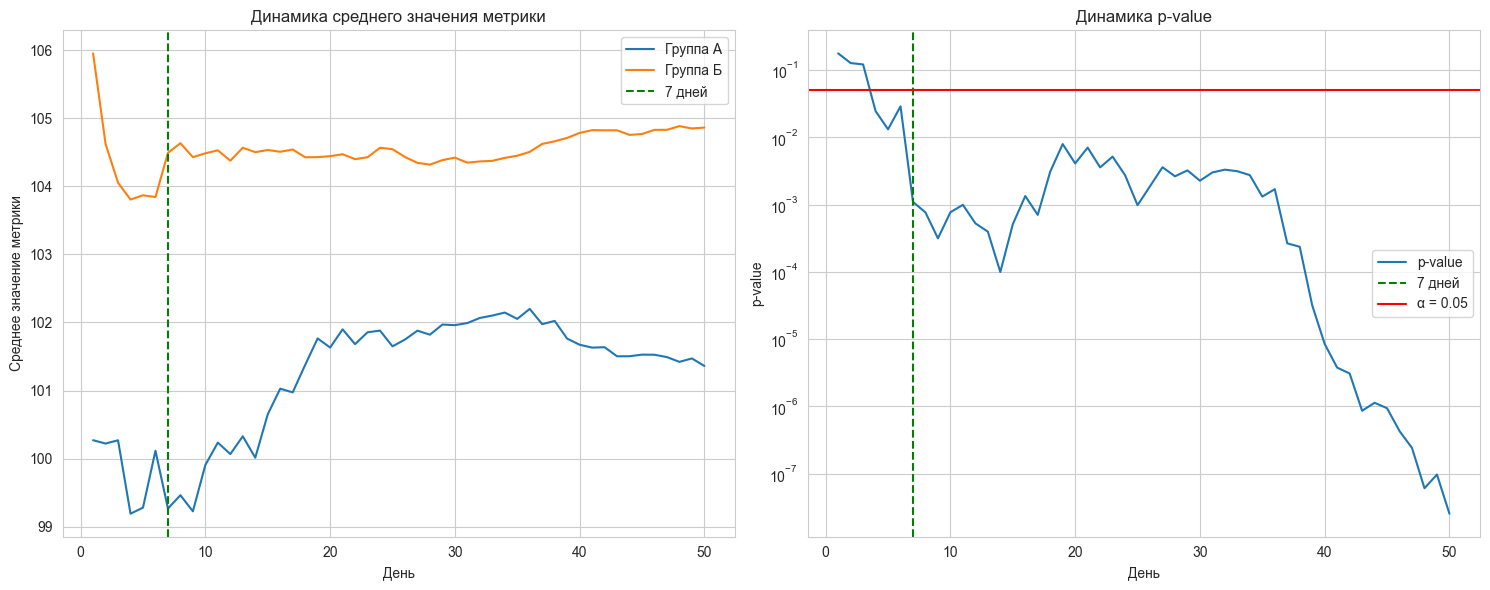

In [ ]:
# Генерация номер 2
df1 = ab_test(n_days, users_daily_group, mu_a, sigma_a, mu_b, sigma_b)
plot_days_pvalue(df1)

`До 7 дней`
* Средние значения метрики нестабильны из-за малого объема выборки, особенно в группе А с высокой дисперсией, p-value колеблется, но становится значимым (<0.05) уже к 3–4-му дню, что позволяет рано обнаружить эффект (MDE=5)

`В точке 7 дней`
* Средние значения метрики стабилизируются, хотя в группе А значения всё ещё довольно хаотичные по сравнению с группой Б, p-value падает до значения в 10<sup>-3</sup>, что подтверждает, что 7 дней достаточно для выявления заданного эффекта (MDE=5)

`После 7 дней`
* Средние значения метрики в группе Б сходятся к теоретическому значению (105), в группе А ещё наблюдаются флуктуации (на 50-й день среднее значение метрики ~101.5), p-value продолжает снижаться экспоненциально, достигая 10<sup>-7</sup>, что отражает высокую мощность теста и уверенность в эффекте (MDE=5)

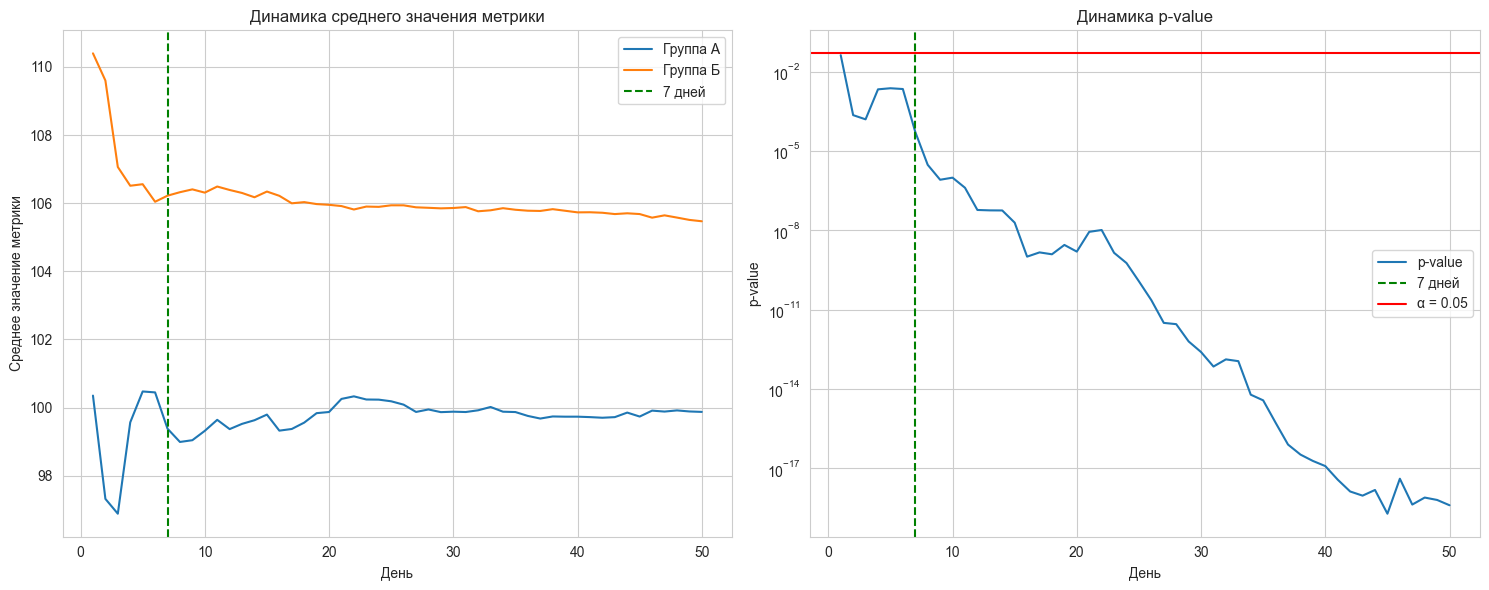

In [ ]:
# Генерация номер 3
df2 = ab_test(n_days, users_daily_group, mu_a, sigma_a, mu_b, sigma_b)
plot_days_pvalue(df2)

`До 7 дней`
* Средние значения метрики также нестабильны из-за малого объёма накопленных данных, особенно в группе А с большей дисперсией, p-value становится значимым (<0.05) уже примерно к 2-3 дню теста

`В точке 7 дней`
* Средние значения метрики стабилизируются, хотя в группе А значения всё ещё есть колебания, p-value падает до значения в 10<sup>-3</sup>, что снова подтверждает то, что 7 дней достаточно для выявления эффекта (MDE=5) в тесте

`После 7 дней`
* Средние значения метрики практически сходятся к теоретическим значениям (100 и 105), при этом p-value продолжает снижение, достигая 10<sup>-17</sup>, что отражает мощность теста и уверенность в наличии эффекта (MDE=5)

6. Теперь предположим, что мы поменяли наш $MDE$ до $1$ у.е. То есть мат. ожидание в группе А осталось по-прежнему $100$, а вот в группе Б теперь $101$. Перегенерируйте пункты 2-4 для измененного $MDE$, при этом кол-во дней в п.1 не пересчитывайте. Что происходит с p-value? Сделайте выводы.

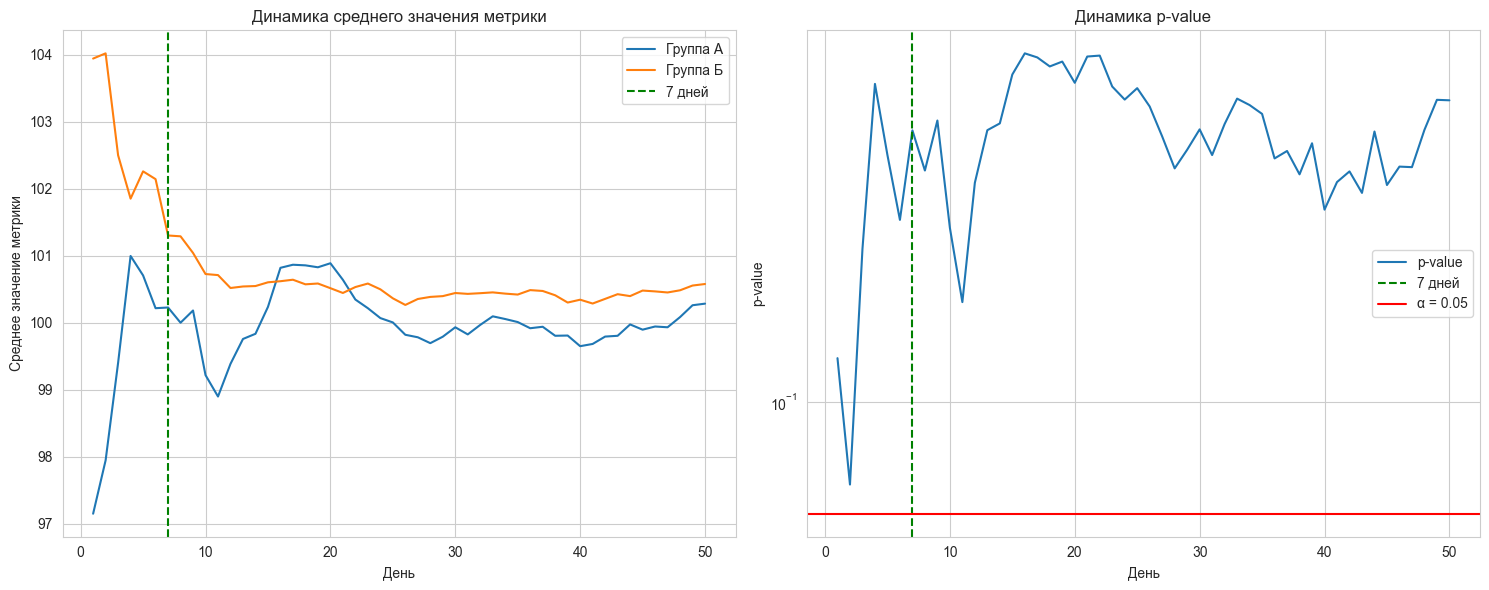

In [ ]:
df3 = ab_test(n_days, users_daily_group, mu_a, sigma_a, 101, sigma_b)
plot_days_pvalue(df3)

`Вывод`
* При MDE=5 разница между средними в группах меньше в 5 раз, чем в прошлых экспериментах, соответственно это ит сложнее обнаружить, на графике p-value видно, что он остается выше уровня значимости (0.05) на протяжении всего эксперимента (50 дней)
* С уменьшением MDE до 1 статистическая мощность теста для 7 дней (да и для 50 тоже) становится недостаточной, так как меньший эффект требует большей выборки для надежного обнаружения

__в) [20 баллов] Симуляция А/А-теста__

Теперь представим, что изменений на самом деле никаких нету, то есть мат. ожидание в обоих группах $100$, а $MDE = 0$

1. И снова перегенерируйте вышесделанные пункты 2-4. Что происходит с p-value? Может ли оно оказаться ниже уровня значимости? 

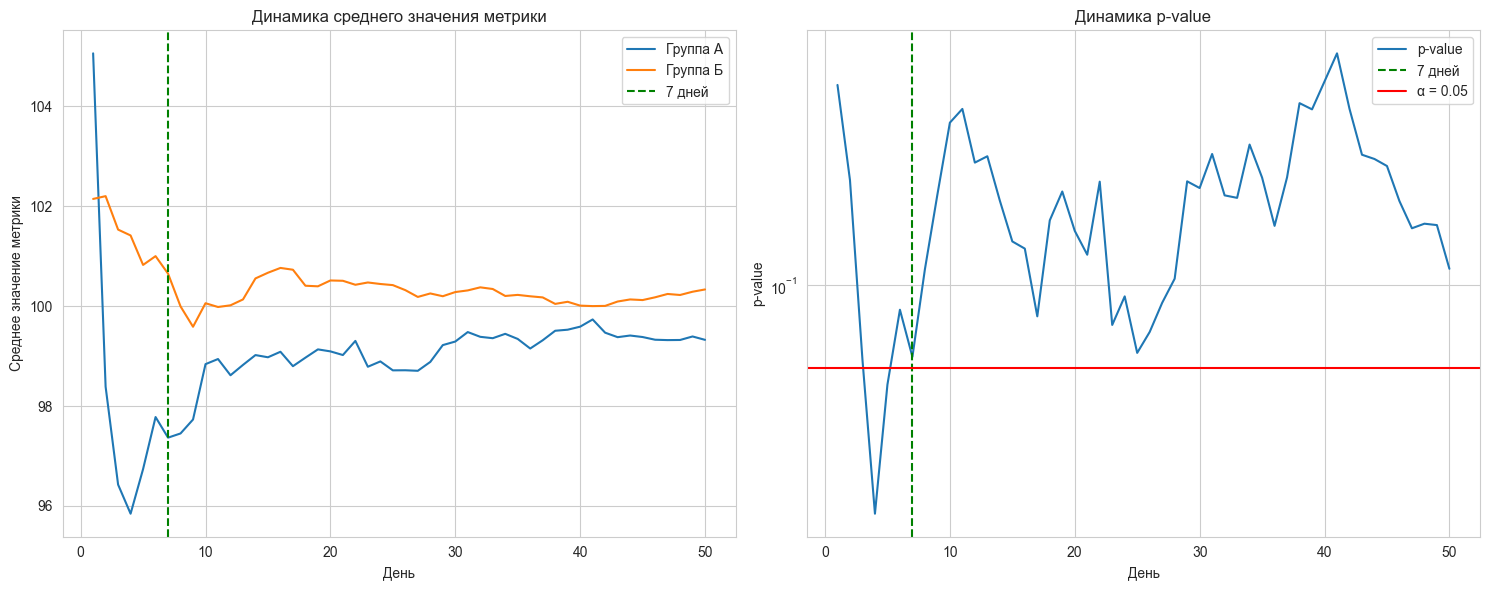

In [ ]:
# MDE = 0
df4 = ab_test(n_days, users_daily_group, mu_a, sigma_a, mu_a, sigma_b)
plot_days_pvalue(df4)

`Выводы`
* Сначала средние значения метрик сильно колеблются, но ожидаемо стабилизируются вокруг значения 100 с накоплением данных, группа А всё также более хаотична (из-за более высокой дисперсии)
* p-value в первые 6 дней находится ниже уровня значимости (0.05), но затем становится выше его, то есть статистическая разница между группами не наблюдается (как мы и ожидаем в АА-теста)

2. Ну и напоследок, напишите функцию, которая генерирует p-value на последний день A/A теста. А затем запустите эту функцию $1000$ раз, собрав $1000$ значений p-value. Постройте гистограмму их распределения. Что вы видите? 

__Подсказка:__ Для такой функции достаточно создать выборку один раз, изменив ее размер.

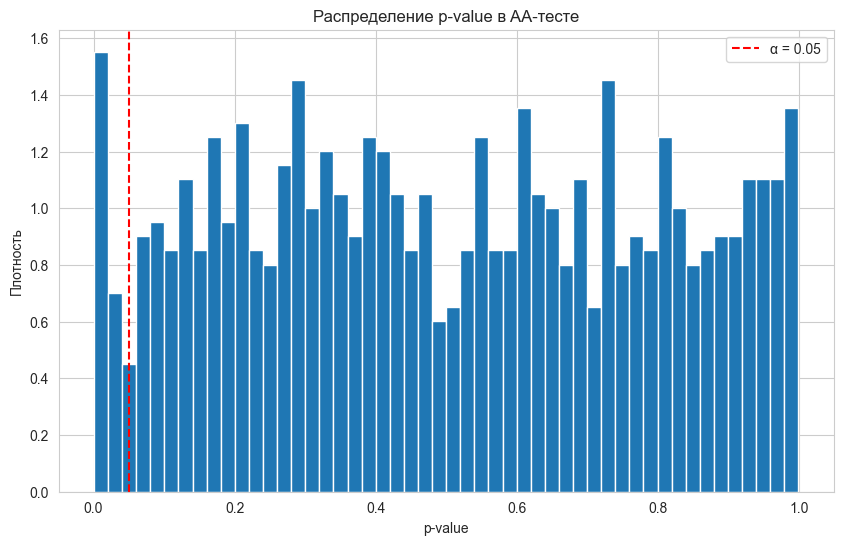

In [ ]:
# Функция для генерации p-value на последний день A/A-теста
def generate_pvalue_aa_test(n_days=50, n_users_per_group=100, mu=100, sigma_a=40, sigma_b=20):
    data_a = np.concatenate([np.random.normal(mu, sigma_a, n_users_per_group) for _ in range(n_days)])
    data_b = np.concatenate([np.random.normal(mu, sigma_b, n_users_per_group) for _ in range(n_days)])
    _, p_value = stats.ttest_ind(data_a, data_b, equal_var=False)

    return p_value

# Генерация 1000 значений p-value
n_sim = 1000
p_values = [generate_pvalue_aa_test() for _ in range(n_sim)]

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(p_values, bins=50, density=True)
plt.title('Распределение p-value в AA-тесте')
plt.xlabel('p-value')
plt.ylabel('Плотность')
plt.axvline(x=0.05, color='red', linestyle='--', label='α = 0.05')
plt.legend()
plt.grid(True)

`Выводы`
* При запуске АА-теста 1000 раз распределение p-value выглядит равномерным на интервале [0,1], это соответствует ожидаемому распределению при верности нулевой гипотезы